In [2]:
import json
import random

from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import polars  as pl
import pyarrow

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('husl')
sns.set_style("whitegrid")

In [3]:
review_df = pl.read_ndjson("./data/yelp_academic_dataset_review.json")
print(review_df.shape)
review_df.head()

(6990280, 9)


review_id,user_id,business_id,stars,useful,funny,cool,text,date
str,str,str,f64,i64,i64,i64,str,str
"""KU_O5udG6zpxOg-VcAEodg""","""mh_-eMZ6K5RLWhZyISBhwA""","""XQfwVwDr-v0ZS3_CbbE5Xw""",3.0,0,0,0,"""If you decide to eat here, jus…","""2018-07-07 22:09:11"""
"""BiTunyQ73aT9WBnpR9DZGw""","""OyoGAe7OKpv6SyGZT5g77Q""","""7ATYjTIgM3jUlt4UM3IypQ""",5.0,1,0,1,"""I've taken a lot of spin class…","""2012-01-03 15:28:18"""
"""saUsX_uimxRlCVr67Z4Jig""","""8g_iMtfSiwikVnbP2etR0A""","""YjUWPpI6HXG530lwP-fb2A""",3.0,0,0,0,"""Family diner. Had the buffet. …","""2014-02-05 20:30:30"""
"""AqPFMleE6RsU23_auESxiA""","""_7bHUi9Uuf5__HHc_Q8guQ""","""kxX2SOes4o-D3ZQBkiMRfA""",5.0,1,0,1,"""Wow! Yummy, different, delic…","""2015-01-04 00:01:03"""
"""Sx8TMOWLNuJBWer-0pcmoA""","""bcjbaE6dDog4jkNY91ncLQ""","""e4Vwtrqf-wpJfwesgvdgxQ""",4.0,1,0,1,"""Cute interior and owner (?) ga…","""2017-01-14 20:54:15"""


In [4]:
review_df = review_df.to_pandas()
review_df = review_df.sample(n=100000)
print(review_df.shape)
review_df.head()

(100000, 9)


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
6805854,OUr7BHPW3EuujEUQfUJNww,K6QWCbYwCS1SNa30ti_M8w,NSpCTkw7IDGV2HKOFvQA4w,4.0,0,0,0,"Came here for the first time, really enjoyed t...",2019-05-08 21:55:23
4034760,k9fOqgB-j-sNFGVebK7jwQ,cMGEHqUw0AE-kTzxFnTlFQ,EbsPMlEkZDeHlBUaH1TrYQ,5.0,0,0,0,Needed a place to eat while waiting for my dog...,2021-04-09 23:28:35
3366151,FlShaOIPfKl0RfSWKaNhlw,0T2UB266WSFK4H6yoEvzAQ,c1-LgoUcXYtw_zVt3FSwSg,5.0,2,0,2,I LOVE Trader Joes! I love French fries and Me...,2018-03-08 03:47:48
3058034,SB-6oD2IgjxpTjpMFLvLRQ,VS-eTvgyCypNq1QHB0RQmg,8jXmNMrGJ2acUG1R-D5e6w,5.0,0,0,0,Stumbled upon this place because I refused to ...,2014-01-11 23:27:28
5829414,R7KDDe2auvR_PcawM4Phxg,_ixImSvRWglr0EpB2D0RJw,6Xj5r3WttTALZsIVHL9ebw,5.0,0,0,0,"Honestly, finest Mexican restaurant in all of ...",2015-09-05 03:23:00


Cross-validated ATE: 2.0778028666087787
Cross-validated CATE (first 10 values): [2.30065828 2.06421249 2.23645464 2.31400449 1.91828699 2.12459762
 1.99942121 2.11156438 2.23987505 2.51495469]


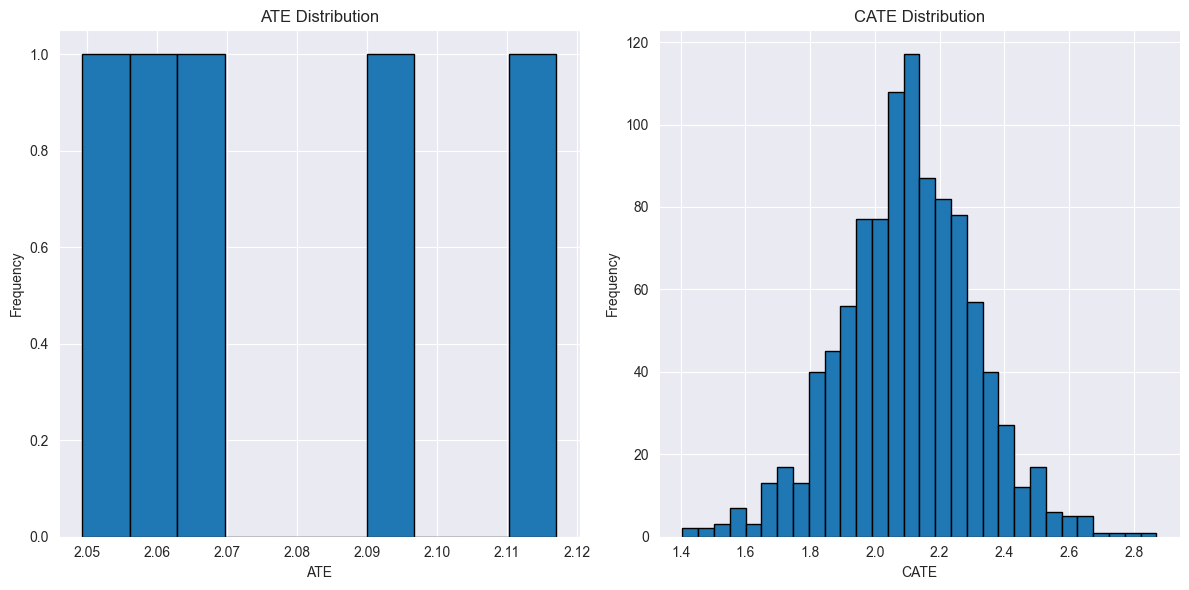

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 데이터 생성
np.random.seed(42)
n = 1000
X = np.random.normal(size=(n, 5))
T = np.random.binomial(1, 0.5, size=n)
Y = 2 * T + X[:, 0] + np.random.normal(size=n)

# 교차 검증을 통한 ATE 추정
kf = KFold(n_splits=5)
ATEs = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    T_train, T_test = T[train_index], T[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = LinearRegression().fit(T_train.reshape(-1, 1), Y_train)
    ATEs.append(model.coef_[0])

ATE = np.mean(ATEs)
print(f"Cross-validated ATE: {ATE}")

# 교차 검증을 통한 CATE 추정
def cate_cv(X, T, Y, kf):
    CATEs = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        T_train, T_test = T[train_index], T[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        
        model_treated = LinearRegression().fit(X_train[T_train == 1], Y_train[T_train == 1])
        model_control = LinearRegression().fit(X_train[T_train == 0], Y_train[T_train == 0])
        
        CATEs.append(model_treated.predict(X_test) - model_control.predict(X_test))
    
    return np.concatenate(CATEs)

CATE_values = cate_cv(X, T, Y, kf)
print(f"Cross-validated CATE (first 10 values): {CATE_values[:10]}")

# 시각화
plt.figure(figsize=(12, 6))

# ATE 시각화
plt.subplot(1, 2, 1)
plt.hist(ATEs, bins=10, edgecolor='black')
plt.title('ATE Distribution')
plt.xlabel('ATE')
plt.ylabel('Frequency')

# CATE 시각화
plt.subplot(1, 2, 2)
plt.hist(CATE_values, bins=30, edgecolor='black')
plt.title('CATE Distribution')
plt.xlabel('CATE')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#  수정
